<a href="https://colab.research.google.com/github/Srinidhi9113/Text_Summarization/blob/main/TextSummarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d /content

In [4]:
import os

classes = os.listdir("/content/BBC News Summary/News Articles")
classes

['sport', 'business', 'tech', 'politics', 'entertainment']

## Text Cleaning

In [5]:
import pandas as pd

In [28]:
articles_dir = "/content/BBC News Summary/News Articles/"
summaries_dir = "/content/BBC News Summary/Summaries/"

articles = []
summaries = []

for cls in classes:
  files = os.listdir(articles_dir + cls)
  for file in files:
    article_file_path = articles_dir + cls +'/' + file
    summary_file_path = summaries_dir + cls +'/' + file

    try:
      with open(article_file_path,'r') as article_file:
        articles.append(".".join([line.rstrip() for line in article_file.readlines()]))
      with open(summary_file_path,'r') as summary_file:
        summaries.append(".".join([line.rstrip() for line in summary_file.readlines()]))
    except:
      pass

dataset = pd.DataFrame({'Article':articles,'Summaries':summaries})

dataset.head()

,Article,Summaries
0,Johnson accuses British sprinters..Former Olym...,Their focus has to be on being the best in the...
1,Munster Cup tie switched to Spain..Munster's H...,Munster's Heineken Cup quarter-final tie again...
2,African double in Edinburgh..World 5000m champ...,World 5000m champion Eliud Kipchoge won the 9....
3,McIlroy aiming for Madrid title..Northern Irel...,Lester is better known for his work with 400m ...
4,Koubek suspended after drugs test..Stefan Koub...,"He said, ""A three-month ban would mean that I ..."


In [29]:
len(dataset)

2224

In [30]:
contractions_dictionary = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                            "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}


In [31]:
from string import digits
import re

def Filter(text):
#     pattern = r'[0-9]'

# # Match all digits in the string and replace them with an empty string
#     text = re.sub(pattern, '', text)
#     remove_digits = str.maketrans('', '', digits)
#     text = text.translate(remove_digits)
    text=text.lower()
    text=' '.join([contractions_dictionary[i] if i in contractions_dictionary.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)

    return text

In [56]:
dataset['Article'] = dataset['Article'].apply(Filter)
dataset['Summaries'] = dataset['Summaries'].apply(Filter)
dataset.head()

,Article,Summaries
0,johnson accuses british olympic champion micha...,focus has to be on being the best in the world...
1,munster cup tie switched to heineken cup tie a...,heineken cup tie against biarritz on april has...
2,african double in champion eliud kipchoge won ...,champion eliud kipchoge won the race at the vi...
3,mcilroy aiming for madrid ireland man james mc...,is better known for his work with runners roge...
4,koubek suspended after drugs koubek says he ha...,a ban would mean that i not only will miss the...


In [33]:
dataset.shape

(2224, 2)

In [34]:
dataset['Summaries'] = dataset['Summaries'].apply(lambda x: '<Start>'+x+'<End>')
dataset.head()

,Article,Summaries
0,johnson accuses british olympic champion micha...,<Start>their focus has to be on being the best...
1,munster cup tie switched to heineken cup tie a...,<Start>munster heineken cup tie against biarri...
2,african double in champion eliud kipchoge won ...,<Start>world champion eliud kipchoge won the r...
3,mcilroy aiming for madrid ireland man james mc...,<Start>lester is better known for his work wit...
4,koubek suspended after drugs koubek says he ha...,<Start>he a ban would mean that i not only wil...


## Convert Text to Vectors

In [35]:
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [36]:
tokenizer = get_tokenizer("basic_english")

def yield_token(text_list):
  for line in text_list:
    yield tokenizer(line)

In [37]:
vocab = build_vocab_from_iterator(yield_token(dataset['Article']), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [73]:
preprocessing_pipeline = lambda x: vocab(tokenizer(x))

# preprocessing_pipeline(dataset['Summaries'][0])

In [54]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(dataset['Article'],dataset['Summaries'],test_size=0.2,random_state=42,shuffle=True)

train_dataframe = pd.DataFrame({'Article':x_tr,'Summaries':y_tr})
x_tr[1]

'munster cup tie switched to heineken cup tie against biarritz on april has been switched to real sociedad paseo de anoeta stadium in san ground holds whereas the parc des sports aguilera in biarritz has a capacity of just the irish province will be given at least the decision to move was a difficult but as we considered the fans as one of our primary said biarritz chairman marcel we hope we will be rewarded as a huge crowd behaving in the best rugby the match will be the first heineken cup fixture to be played in and is expected to attract the attendance for a rugby match in the ulster were the last irish team to play at the paseo de anoeta stadium where they faced a euskarians side during a tour in'

## Creating a Dataset

In [40]:
from torch.utils.data import Dataset

class TextSummDataset(Dataset):
  def __init__(self,
               dataFrame,
               transform=None):
    self.transfrom = transform
    self.x_train = dataFrame['Article']
    self.y_train = dataFrame['Summaries']

  def __len__(self):
    return len(self.y_train)

  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]


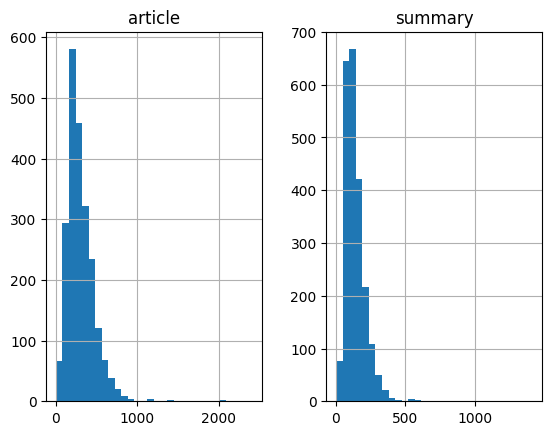

In [44]:
import matplotlib.pyplot as plt

article_words_count = []
summary_words_count = []

for article in dataset['Article']:
  article_words_count.append(len(article.split()))

for summary in dataset['Summaries']:
  summary_words_count.append(len(summary.split()))

length_df = pd.DataFrame({'article':article_words_count,'summary':summary_words_count})
length_df.hist(bins=30)
plt.show()

In [66]:
max(set(article_words_count), key=article_words_count.count)
max(set(summary_words_count), key=summary_words_count.count)

105